## Initial Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Extrovert vs. Introvert Behavior dataset
df = pd.read_csv('personality_datasert.csv')
print("Dataset loaded successfully!\n")

Dataset loaded successfully!



In [ ]:
print("--- All Column Names in Dataset ---\n")
print(df.columns)

--- All Column Names in Dataset ---

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')


## Exploratory Data Analysis (EDA)

EDA is a data analysis approach used to summarize and understand the main characteristics of a dataset. In this case, we will examine the data distribution, indentify outliers and explore relationships between variables for this dataset.

In [ ]:
# First 5 Rows
print("--- First 5 Rows of the Dataset ---\n")
print(df.head())
print("\n" + "="*50 + "\n")

--- First 5 Rows of the Dataset ---

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  




In [ ]:
# Information of Dataset
print("--- Dataset Information ---\n")
df.info()
print("\n" + "="*50 + "\n")


--- Dataset Information ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB




In [ ]:
# Check for Missing Values
print("--- Missing Values in the Dataset ---\n")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

--- Missing Values in the Dataset ---

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64




In [ ]:
# Descriptive Statistics
print("--- Descriptive Statistics for Numerical Columns ---\n")
print(df.describe()) # shows count, mean, std, min, max for numerical columns
print("\n" + "="*50 + "\n")

--- Descriptive Statistics for Numerical Columns ---

       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2900.000000              2900.000000    2900.000000   
mean           4.505816                 3.963354       3.000000   
std            3.441180                 2.872608       2.221597   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.963354       3.000000   
75%            7.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2900.000000     2900.000000  
mean              6.268863        3.564727  
std               4.232340        2.893587  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000 

In [ ]:
print("--- Value Counts for Categorical Columns ---\n")
for col in df.select_dtypes(include='object').columns:
    if col != 'Personality':
      print(f"\nValue counts for '{col}':\n")
      print(df[col].value_counts())
    print("\n" + "="*50 + "\n")

--- Value Counts for Categorical Columns ---


Value counts for 'Stage_fear':

Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64



Value counts for 'Drained_after_socializing':

Drained_after_socializing
No     1493
Yes    1407
Name: count, dtype: int64






In [ ]:
print("--- Distribution of the Target Variable ('Personality') ---")
print(df['Personality'].value_counts())
# Also show as percentage
print(df['Personality'].value_counts(normalize=True) * 100)
print("\n" + "="*50 + "\n")

--- Distribution of the Target Variable ('Personality') ---
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64
Personality
Extrovert    51.413793
Introvert    48.586207
Name: proportion, dtype: float64




--- Visualizing Distribution of Numerical Features ---



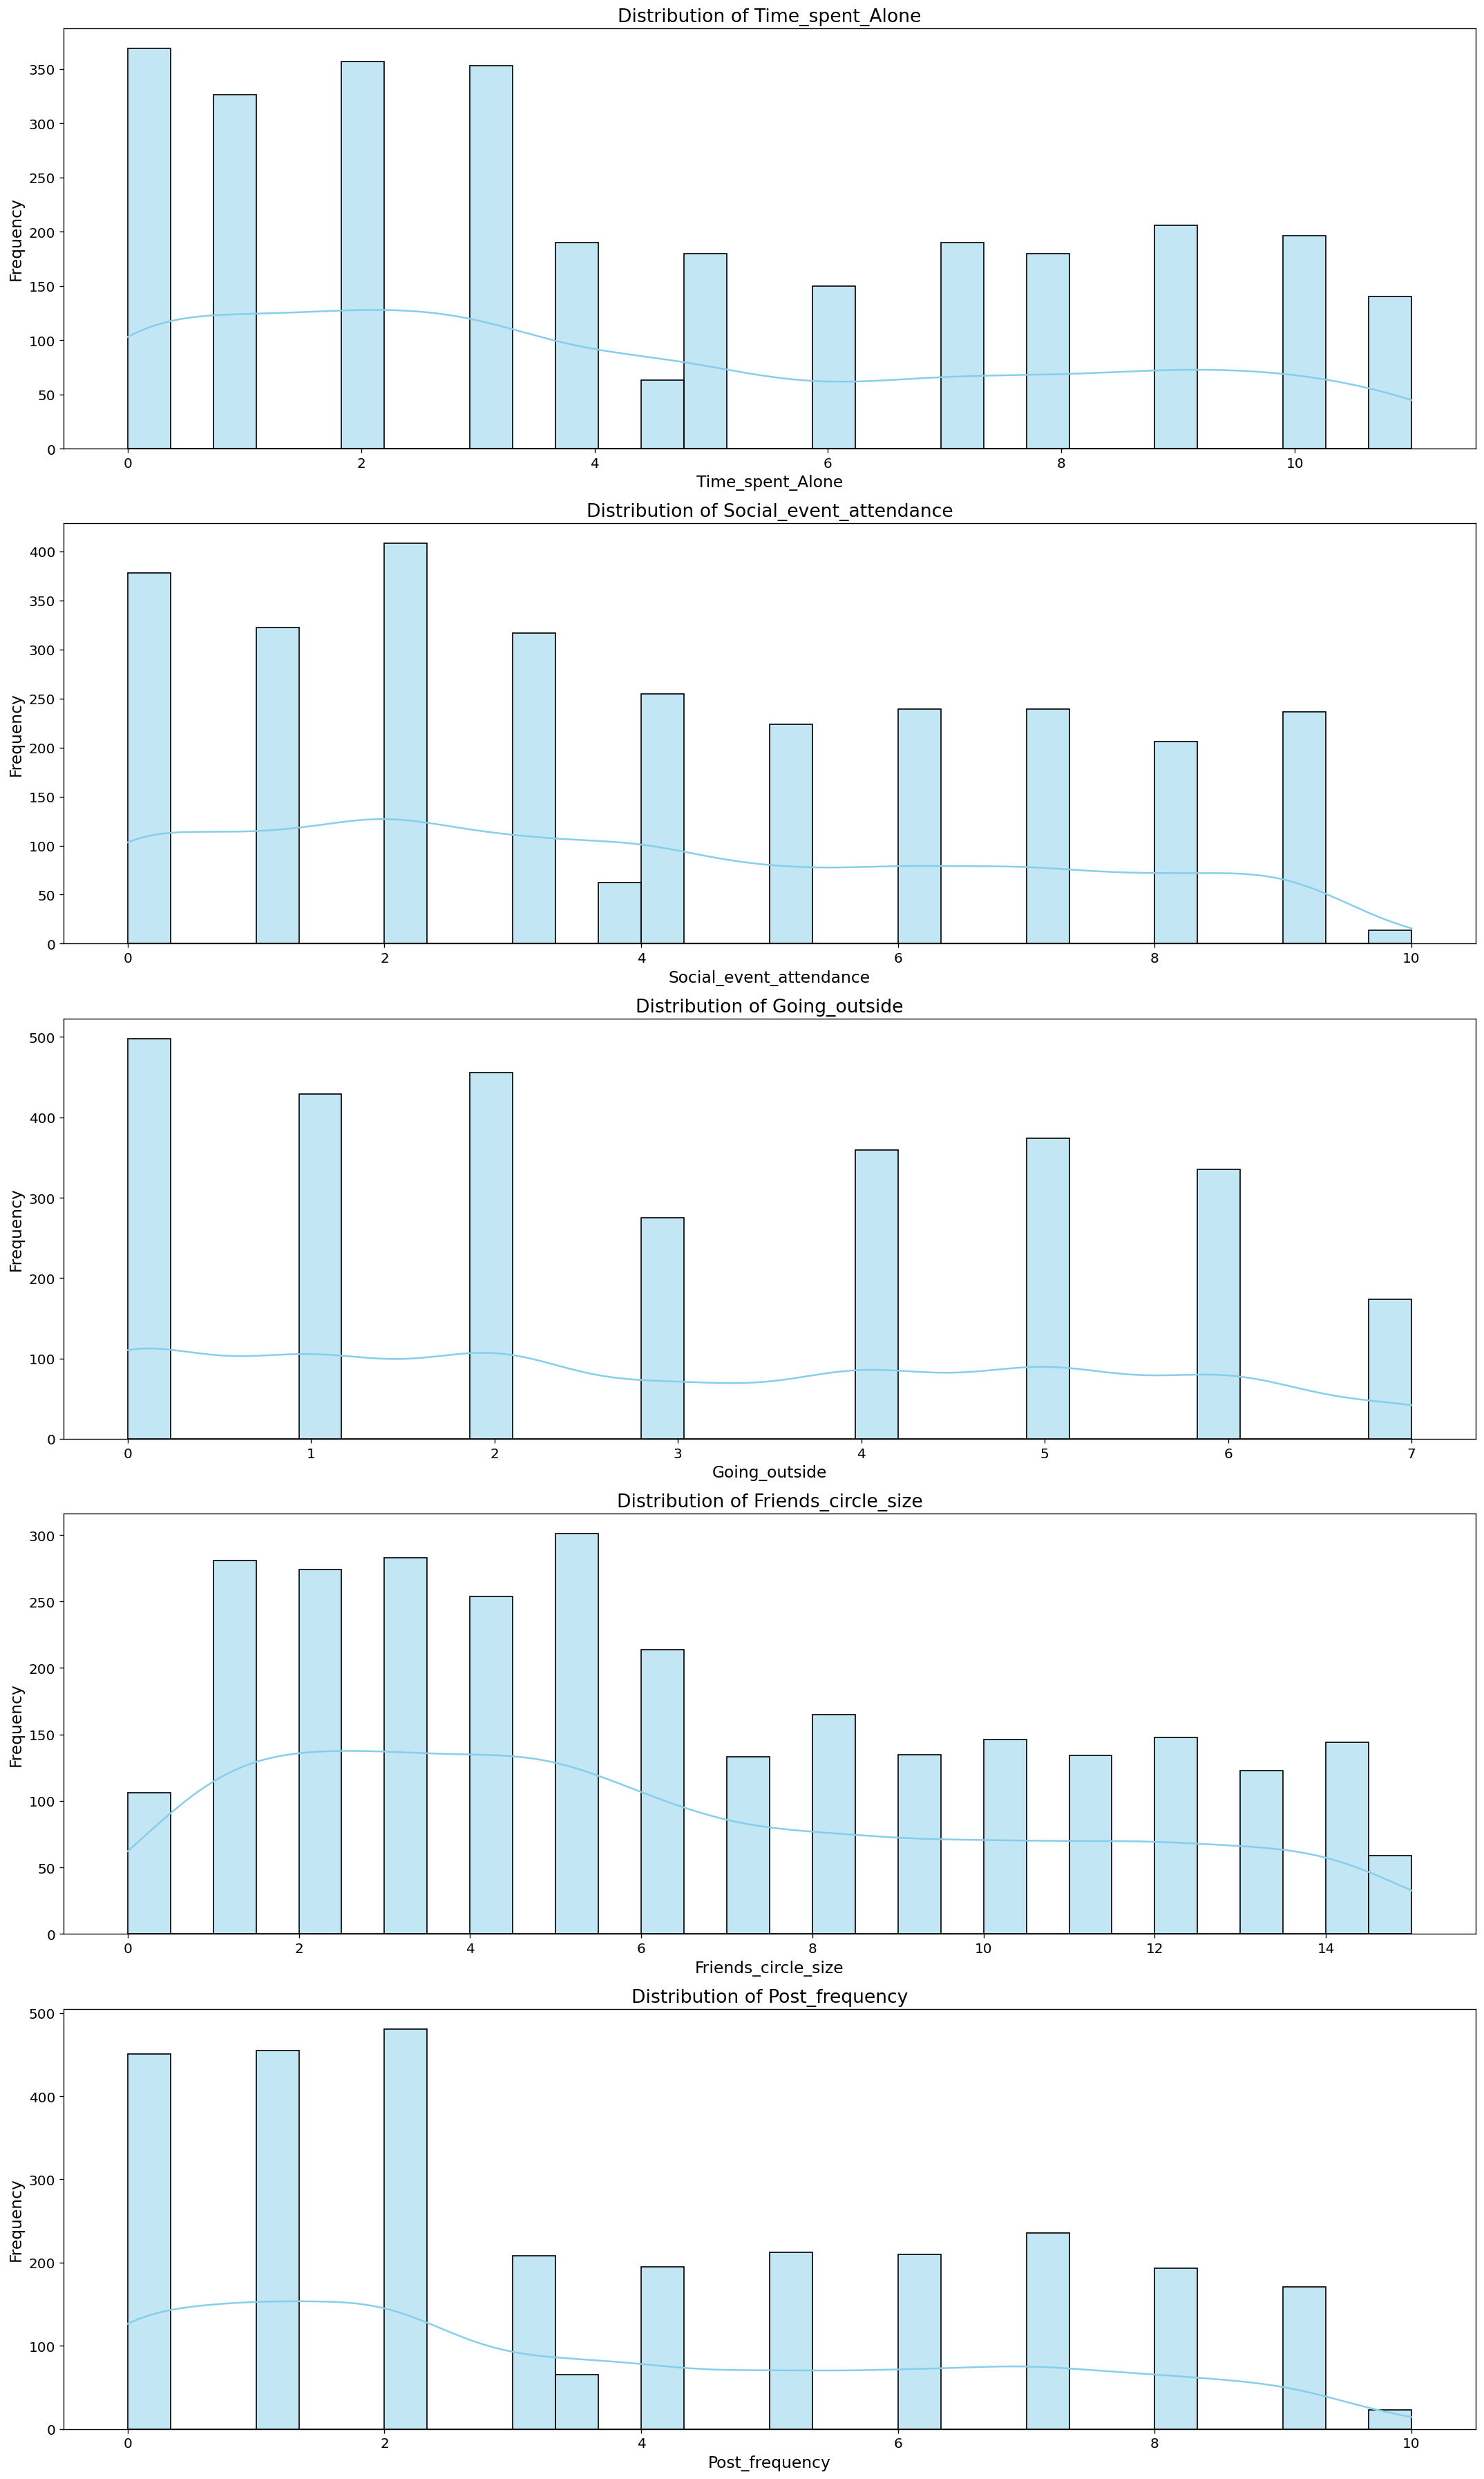

In [ ]:
print("--- Visualizing Distribution of Numerical Features ---\n")
# get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# set up figure with subplots
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(18, 6 * len(numerical_cols)), dpi=120)
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=16)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

--- Visualizing Distributions of Categorical Features ---


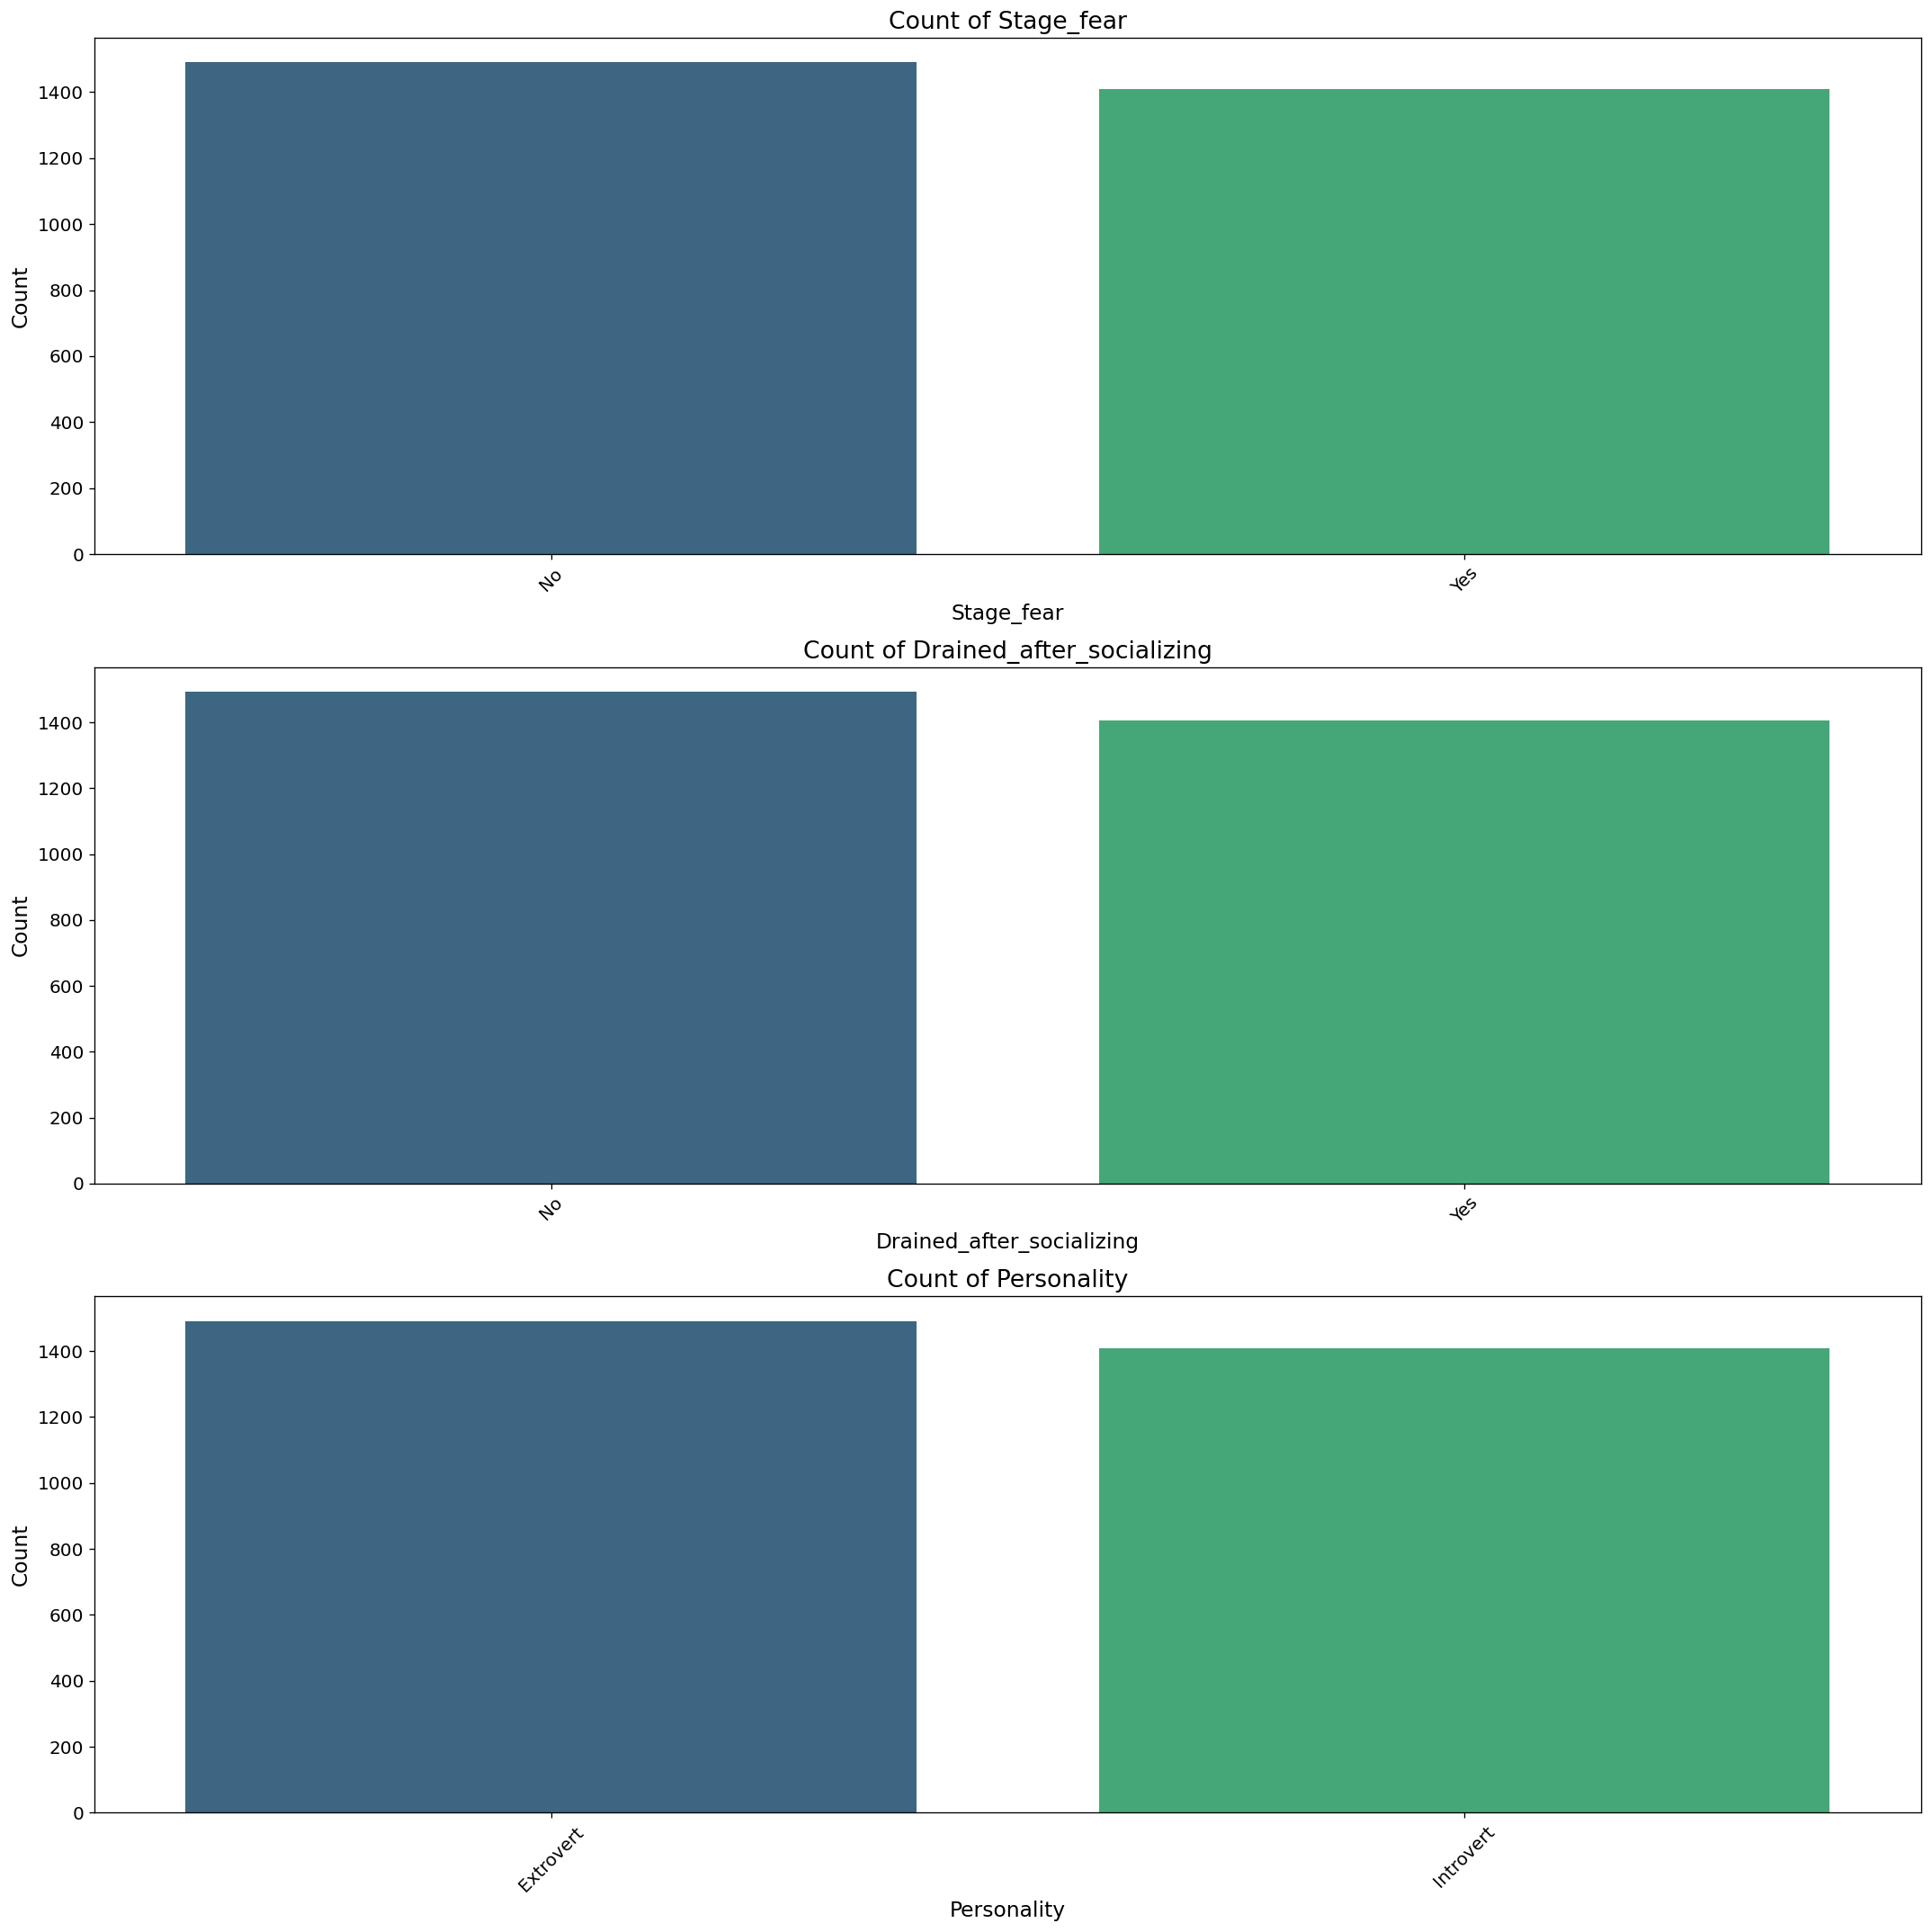

In [ ]:
print("--- Visualizing Distributions of Categorical Features ---")
# get categorical columns
categorical_cols = df.select_dtypes(include='object').columns
# create subplots in one figure
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(18, 6 * len(categorical_cols)), dpi=120)
# wrap axes if only one plot
if len(categorical_cols) == 1:
    axes = [axes]

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue=col,
                  order=df[col].value_counts().index,
                  palette='viridis',
                  legend=False,
                  ax=axes[i])

    axes[i].set_title(f'Count of {col}', fontsize=16)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    axes[i].tick_params(axis='x', labelrotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

--- Relationship between Numerical Features and Personality ---


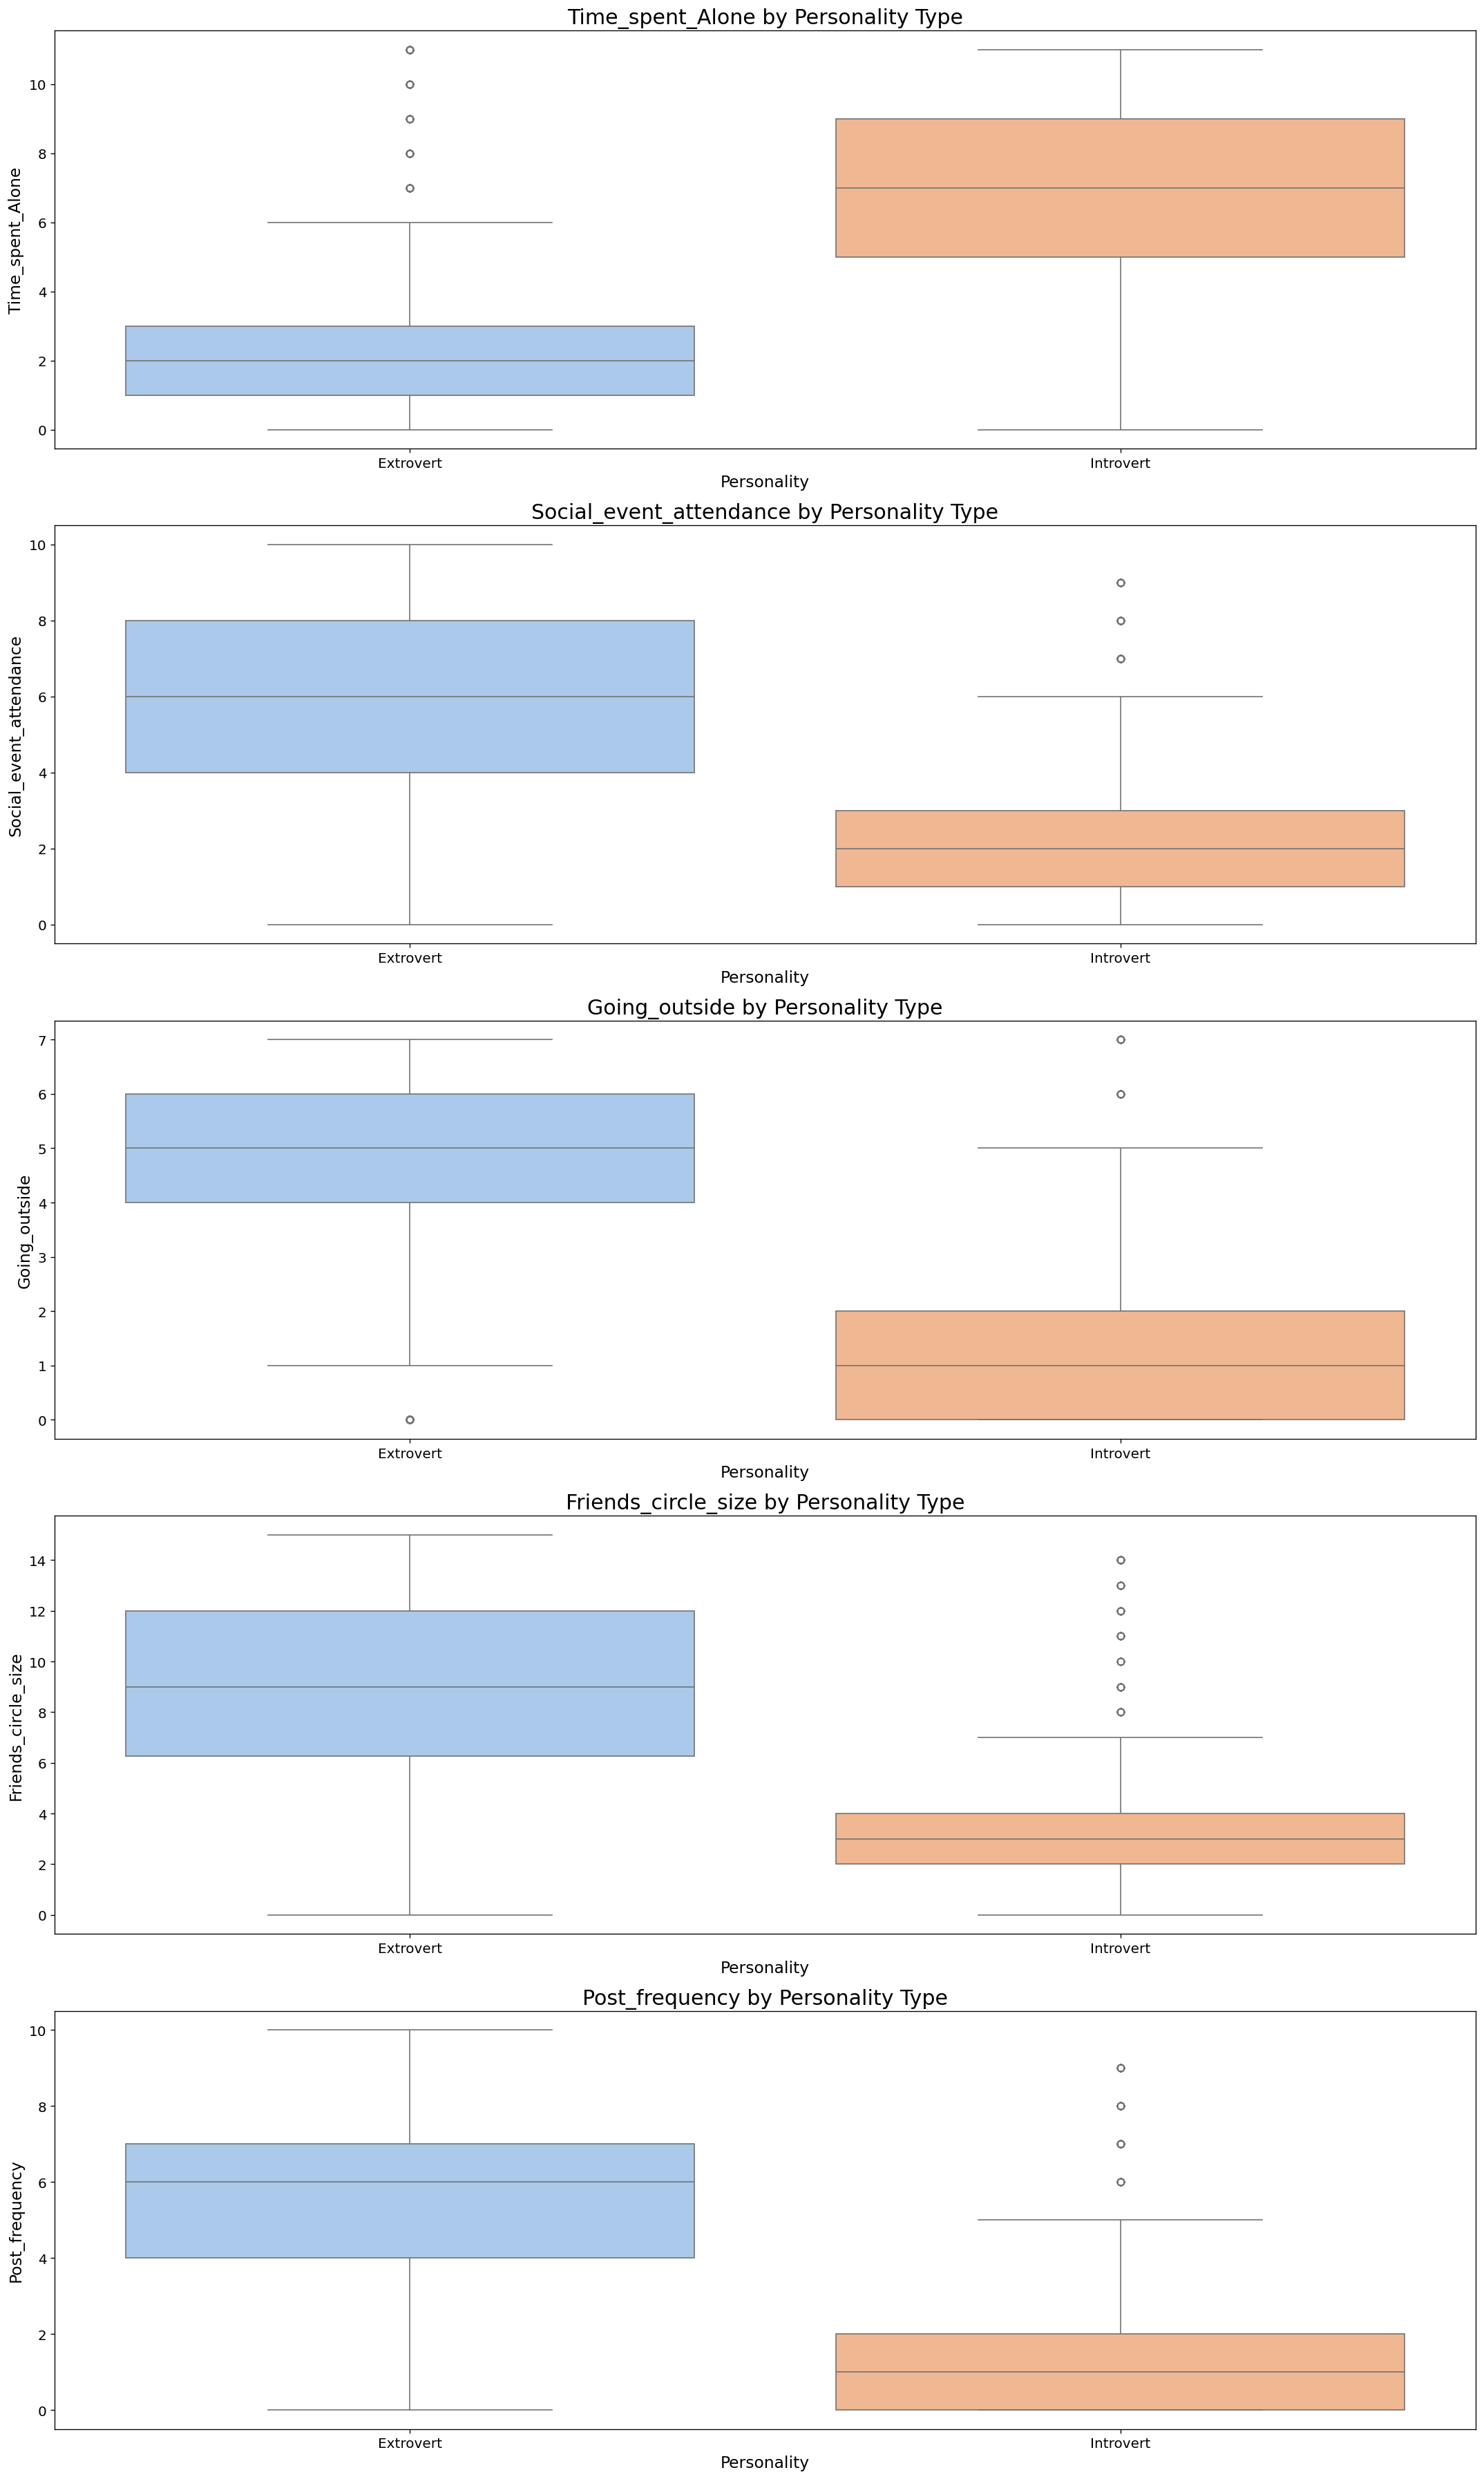

In [ ]:
print("--- Relationship between Numerical Features and Personality ---")

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(18, 6 * len(numerical_cols)), dpi=120)
# handle case with one plot
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    sns.boxplot(
        data=df,
        x='Personality',
        y=col,
        hue='Personality',
        palette='pastel',
        dodge=False,
        ax=axes[i]
    )
    axes[i].set_title(f'{col} by Personality Type', fontsize=18)
    axes[i].set_xlabel('Personality', fontsize=14)
    axes[i].set_ylabel(col, fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

--- Relationship between Categorical Features and 'Personality' (Proportions) ---


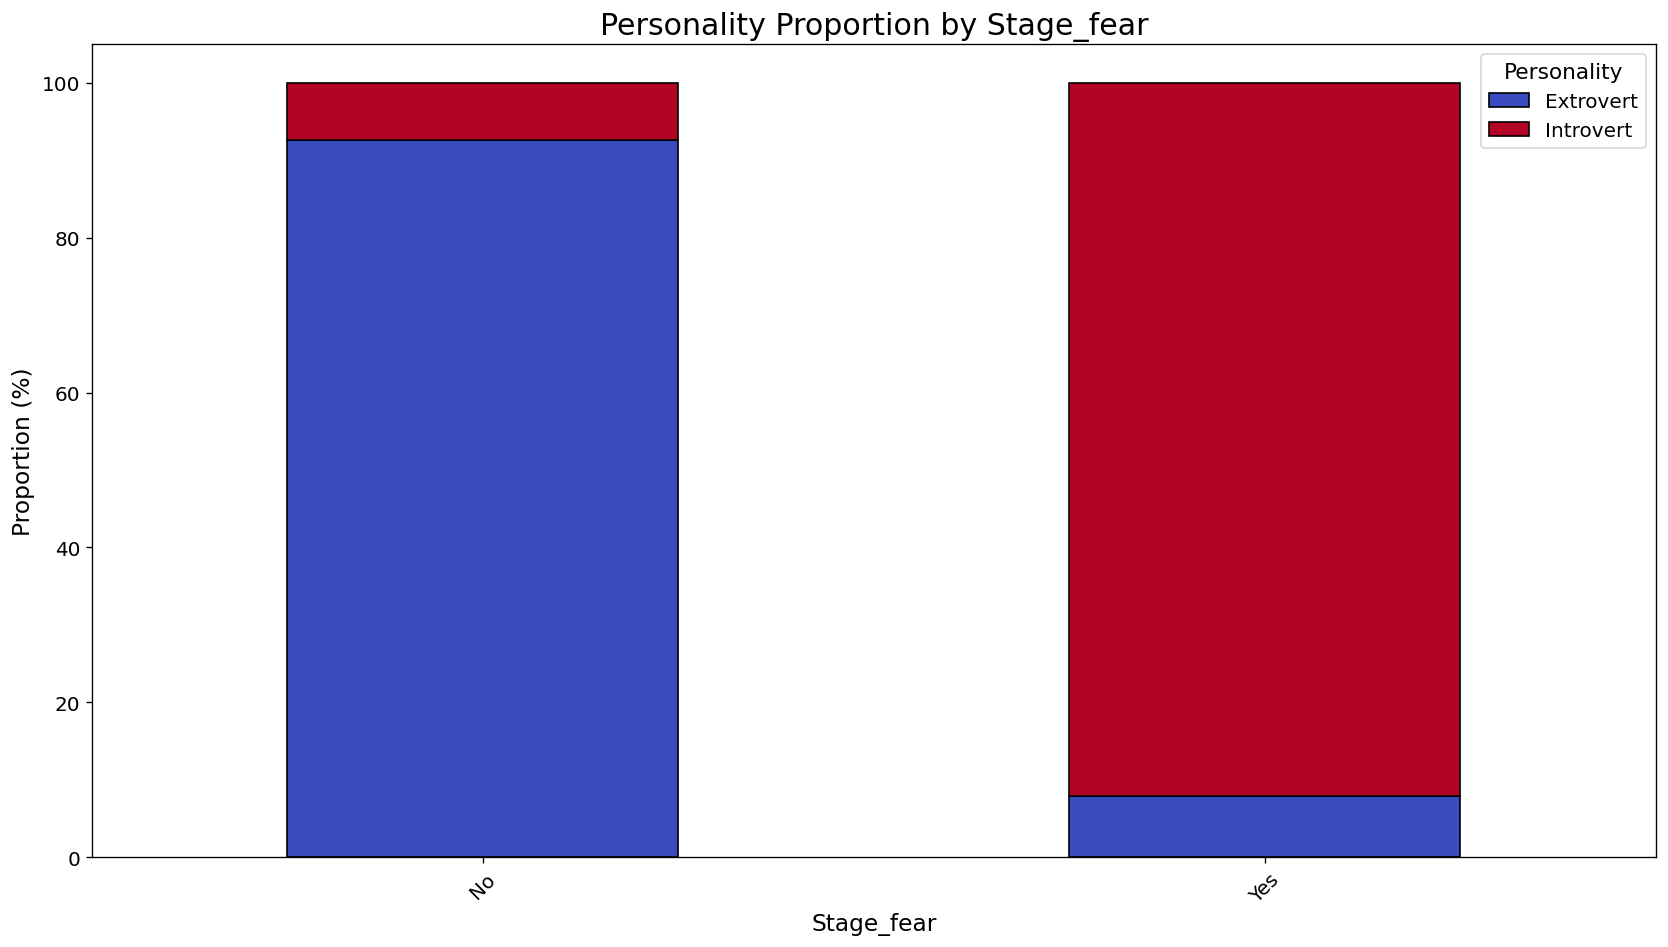

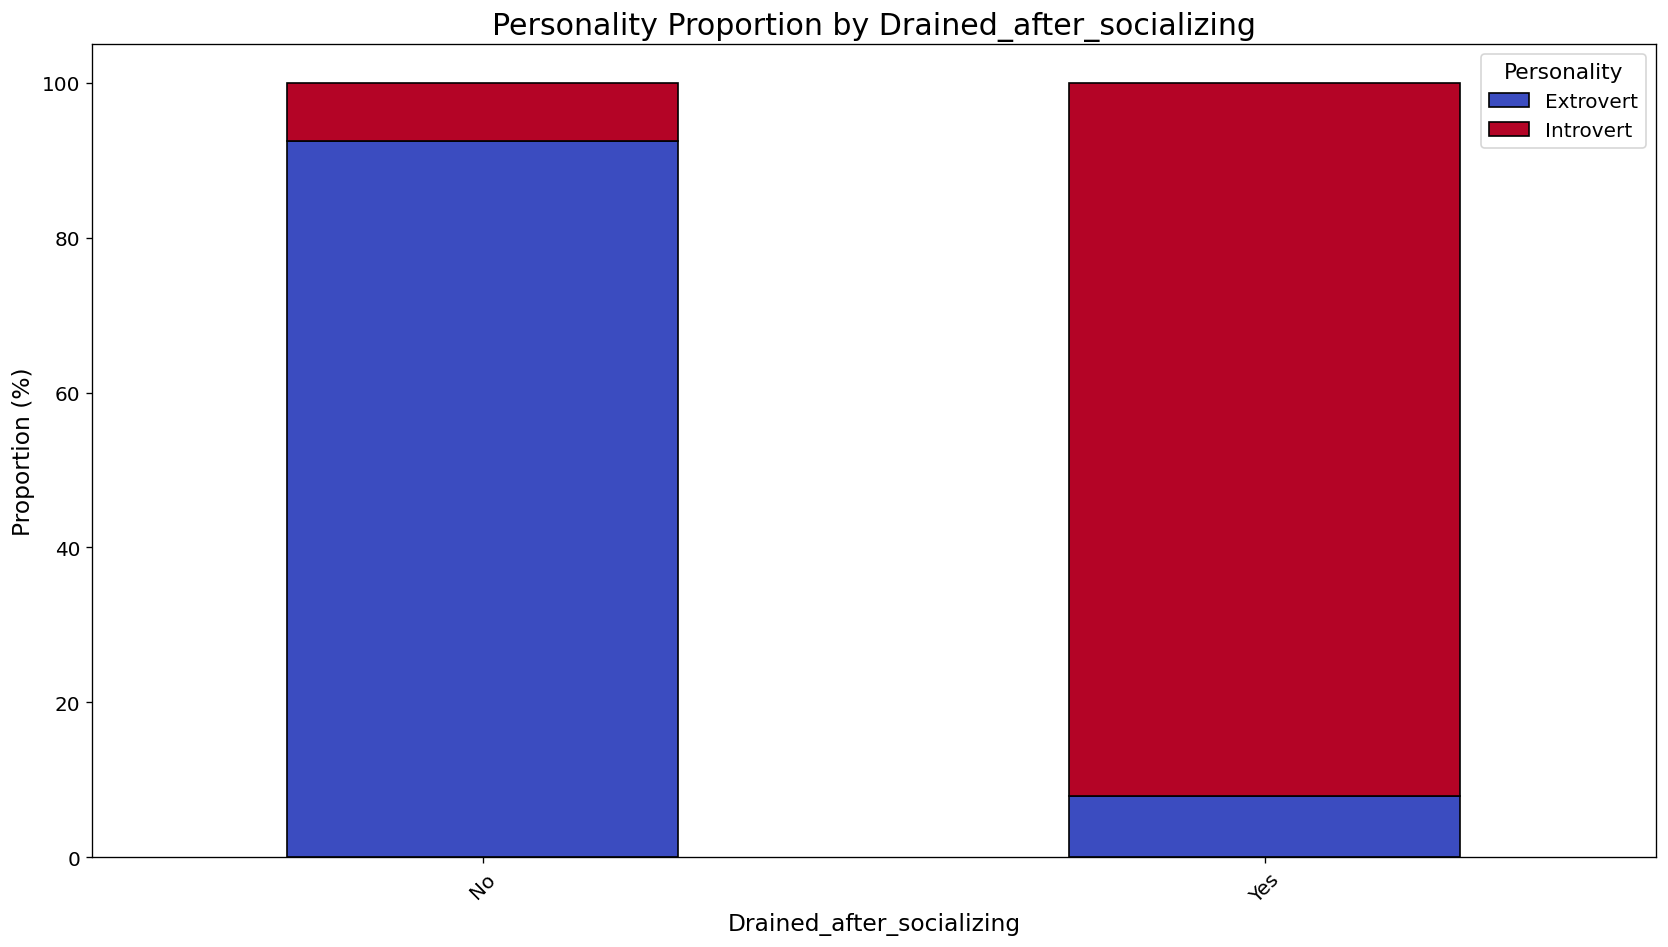

In [ ]:
print(f"--- Relationship between Categorical Features and 'Personality' (Proportions) ---")

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if col != 'Personality':
        fig, ax = plt.subplots(figsize=(14, 8), dpi=120)
        cross_tab = pd.crosstab(df[col], df['Personality'], normalize='index') * 100
        cross_tab.plot(kind='bar', stacked=True, ax=ax, cmap='coolwarm', edgecolor='black')
        ax.set_title(f'Personality Proportion by {col}', fontsize=18)
        ax.set_xlabel(col, fontsize=14)
        ax.set_ylabel('Proportion (%)', fontsize=14)
        ax.tick_params(axis='x', labelrotation=45, labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.legend(title='Personality', fontsize=12, title_fontsize=13)

        plt.tight_layout()
        plt.show()

print("\n" + "="*50 + "\n")

# Data Preprocessing and Issues

This section ensures the dataset is clean, consistent and transformed for model building. This process is broken down to 4 phases such as Data Cleaning, Data Transformation, Data Reduction and Data Integration.

Key steps include:

**Phase 1: Data Cleaning**
1.   Removing Duplicates.
2.   Convert Data Types.
3.   Handle Missing Values.
4.   Outlier Detection.

**Phase 2: Data Transformation**


1.   Encode Categorical Variables.
2.   Discretization.
3.   Feature Engineering.

**Phase 3: Data Reduction**

1.   Dimensionality Reduction.

**Phase 4: Data Integration**


1.   Export Cleaned Dataset.











## Phase 1: Data Cleaning

In [ ]:
# Preview Rows
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
#View Column Names and Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [ ]:
#Statistics for Numeric Features
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [ ]:
#Value Counts for Target Column.
df['Personality'].value_counts()

,count
Personality,
Extrovert,1491
Introvert,1409


In [ ]:
# Key Step 1: Remove Duplicates.
print("Number of duplicated rows:", df.duplicated().sum())
df_cleaned = df.drop_duplicates().reset_index(drop=True)

#Verification.
print("Verification:")
print("Number of duplicated rows after drop:", df_cleaned.duplicated().sum())
print("Number of original rows:", df.shape[0])
print("Number of rows after removing duplicates:", df_cleaned.shape[0])



Number of duplicated rows: 402
Verification:
Number of duplicated rows after drop: 0
Number of original rows: 2900
Number of rows after removing duplicates: 2498


In [ ]:
# Key Step 2: Convert Data Types.

#Check current data types.
print("Data Types before correction:\n", df_cleaned.dtypes)

#Convert float columns to integers.
df_cleaned['Time_spent_Alone'] = df_cleaned['Time_spent_Alone'].astype(int)
df_cleaned['Social_event_attendance'] = df_cleaned['Social_event_attendance'].astype(int)
df_cleaned['Going_outside'] = df_cleaned['Going_outside'].astype(int)
df_cleaned['Friends_circle_size'] = df_cleaned['Friends_circle_size'].astype(int)
df_cleaned['Post_frequency'] = df_cleaned['Post_frequency'].astype(int)

#Convert object columns to category.
df_cleaned['Stage_fear'] = df_cleaned['Stage_fear'].astype('category')
df_cleaned['Drained_after_socializing'] = df_cleaned['Drained_after_socializing'].astype('category')
df_cleaned['Personality'] = df_cleaned['Personality'].astype('category')

#Check updated data types.
print("\nData Types after correction:\n", df_cleaned.dtypes)


Data Types before correction:
 Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

Data Types after correction:
 Time_spent_Alone                int64
Stage_fear                   category
Social_event_attendance         int64
Going_outside                   int64
Drained_after_socializing    category
Friends_circle_size             int64
Post_frequency                  int64
Personality                  category
dtype: object


In [ ]:
#Key Step 3: Handle Missing Values.
print("Number of Missing Values", df_cleaned.isna().sum())

#No Missing Values Found, therefore no imputation is needed.

Number of Missing Values Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


Time_spent_Alone -> Outliers: 0


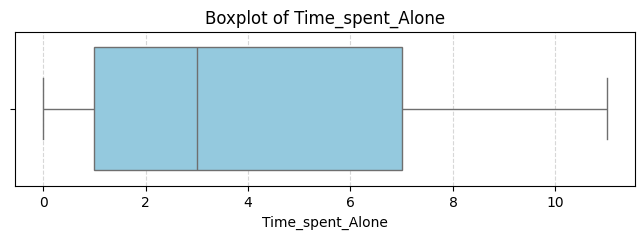

Social_event_attendance -> Outliers: 0


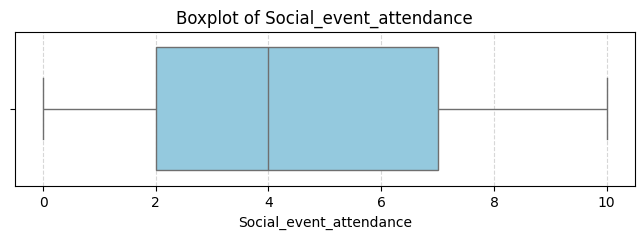

Going_outside -> Outliers: 0


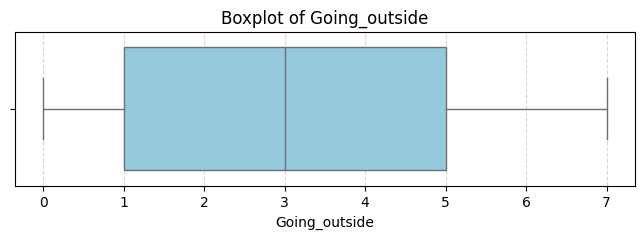

Friends_circle_size -> Outliers: 0


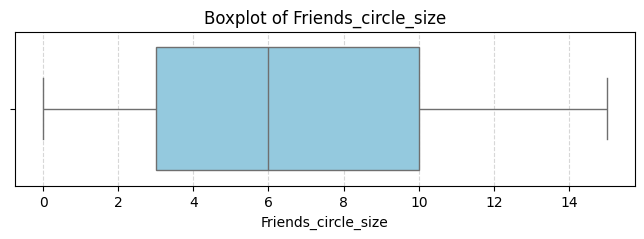

Post_frequency -> Outliers: 0


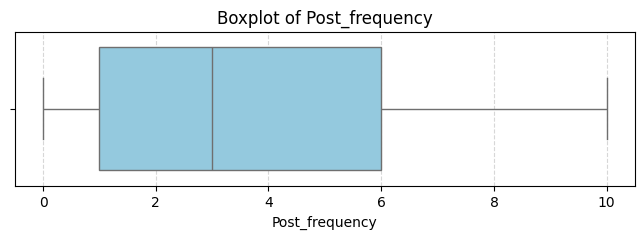

In [ ]:
#Key Step 4: Outlier Detection.

#List of numerical columns.
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']


#Outlier Detection using IQR Method.
for col in numerical_cols:
  Q1 = df_cleaned[col].quantile(0.25)
  Q3 = df_cleaned[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
  print(f"{col} -> Outliers: {outliers.shape[0]}")

  #Plot Boxplot.
  plt.figure(figsize=(8, 2))
  sns.boxplot(x=df_cleaned[col], color='skyblue')
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.grid(axis='x', linestyle='--', alpha=0.5)
  plt.show()

  #No Outliers for the numerical columns.

## Phase 2: Data Transformation

In [ ]:
#Key Step 1: Encode Categorical Variables.

#Check for unique values.
print("Stage_fear:", df_cleaned['Stage_fear'].unique())
print("Drained_after_socializing:", df_cleaned['Drained_after_socializing'].unique())
print("Personality:", df_cleaned['Personality'].unique())

#Only 2 unique values are found from each of the categorical variables. Binary Encoding is suitable.

#Encode categorical variables.
df_cleaned['Stage_fear'] = df_cleaned['Stage_fear'].map({'Yes': 1, 'No': 0})
df_cleaned['Drained_after_socializing'] = df_cleaned['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df_cleaned['Personality'] = df_cleaned['Personality'].map({'Extrovert':1, 'Introvert':0})

#Verify Encoding.
print("\nEncoded Categorical Variables:")
print(df_cleaned[['Stage_fear', 'Drained_after_socializing', 'Personality']].head())

Stage_fear: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Drained_after_socializing: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Personality: ['Extrovert', 'Introvert']
Categories (2, object): ['Extrovert', 'Introvert']

Encoded Categorical Variables:
  Stage_fear Drained_after_socializing Personality
0          0                         0           1
1          1                         1           0
2          1                         1           0
3          0                         0           1
4          0                         0           1


In [ ]:
#Key Step 2: Discretization (Convert Numerical to Categorical)

#Define Custom Labels.
labels = ['Low', 'Medium', 'High', 'Very High']

#Discretize Time_spent_Alone.
df_cleaned['Time_spent_Alone_binned'] = pd.cut(df_cleaned['Time_spent_Alone'], bins=[-1,4,7,10, float('inf')], labels=labels)

#Discretize Friends_circle_size.
df_cleaned['Friends_circle_size_binned'] = pd.cut(df_cleaned['Friends_circle_size'], bins=[-1,4,7,10, float('inf')], labels=labels)

#Preview the new columns.
print(df_cleaned[['Time_spent_Alone', 'Time_spent_Alone_binned', 'Friends_circle_size', 'Friends_circle_size_binned']].head())

   Time_spent_Alone Time_spent_Alone_binned  Friends_circle_size  \
0                 4                     Low                   13   
1                 9                    High                    0   
2                 9                    High                    5   
3                 0                     Low                   14   
4                 3                     Low                    8   

  Friends_circle_size_binned  
0                  Very High  
1                        Low  
2                     Medium  
3                  Very High  
4                       High  


In [ ]:
#Key Step 3: Feature Engineering (Add new Features)

#1. Create Social Engagement Score Column.
df_cleaned['Social_engagement_score'] = (df_cleaned['Social_event_attendance'] + df_cleaned['Going_outside'] + df_cleaned['Post_frequency'])

#2. Create Introversion Tendency Score.
df_cleaned['Introversion_tendency_score'] = (df_cleaned['Stage_fear'].astype(int) + df_cleaned['Drained_after_socializing'].astype(int)+ df_cleaned['Time_spent_Alone'])


#Discretize Introversion Tendency Score.
df_cleaned['Introversion_tendency_score'] = pd.cut(df_cleaned['Introversion_tendency_score'], bins=[-1,5,8,10, float('inf')], labels=['Low','Medium','High','Very High'])

#Preview the new columns.
print(df_cleaned[['Social_engagement_score', 'Introversion_tendency_score']].head(30))

    Social_engagement_score Introversion_tendency_score
0                        15                         Low
1                         3                   Very High
2                         5                   Very High
3                        21                         Low
4                        18                         Low
5                        18                         Low
6                        19                         Low
7                        20                         Low
8                         7                   Very High
9                        22                         Low
10                       20                         Low
11                        4                   Very High
12                       23                         Low
13                       17                         Low
14                        6                      Medium
15                       16                         Low
16                        0                   Ve

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode the binned columns
label_encoders = {}
categorical_cols = ['Time_spent_Alone_binned', 'Friends_circle_size_binned', 'Introversion_tendency_score']

for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

#Preview the encoded columns.
print(df_cleaned[['Time_spent_Alone_binned', 'Friends_circle_size_binned', 'Introversion_tendency_score']].head())

   Time_spent_Alone_binned  Friends_circle_size_binned  \
0                        1                           3   
1                        0                           1   
2                        0                           2   
3                        1                           3   
4                        1                           0   

   Introversion_tendency_score  
0                            1  
1                            3  
2                            3  
3                            1  
4                            1  


## Phase 3: Data Reduction

In [ ]:
#Key Step 1: Dimensionality Reduction.

#Drop columns that have been discretized.
df_cleaned = df_cleaned.drop(['Time_spent_Alone','Friends_circle_size'], axis=1)

#Verify removal.
print("Remaining Columns:\n", df_cleaned.columns.tolist())


Remaining Columns:
 ['Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Post_frequency', 'Personality', 'Time_spent_Alone_binned', 'Friends_circle_size_binned', 'Social_engagement_score', 'Introversion_tendency_score']


## Phase 4: Data Integration

In [ ]:
#Key Step 1: Export Final Cleaned Dataset.
df_cleaned.to_csv('personality_dataset_cleaned.csv', index=False)
print("Dataset exported successfully!")

#Check shape and sample.
print("Shape of the cleaned dataset:", df_cleaned.shape)
print("Sample of the cleaned dataset:")
print(df_cleaned.head())

Dataset exported successfully!
Shape of the cleaned dataset: (2498, 10)
Sample of the cleaned dataset:
  Stage_fear  Social_event_attendance  Going_outside  \
0          0                        4              6   
1          1                        0              0   
2          1                        1              2   
3          0                        6              7   
4          0                        9              4   

  Drained_after_socializing  Post_frequency Personality  \
0                         0               5           1   
1                         1               3           0   
2                         1               2           0   
3                         0               8           1   
4                         0               5           1   

   Time_spent_Alone_binned  Friends_circle_size_binned  \
0                        1                           3   
1                        0                           1   
2                        0     

# Model Building

In [ ]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Separate features and target
X = df_cleaned.drop('Personality', axis=1)
y = df_cleaned['Personality']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression


Accuracy of the Logistic Regression model: 0.91

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Introvert       0.88      0.91      0.90       221
   Extrovert       0.93      0.90      0.91       279

    accuracy                           0.91       500
   macro avg       0.90      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



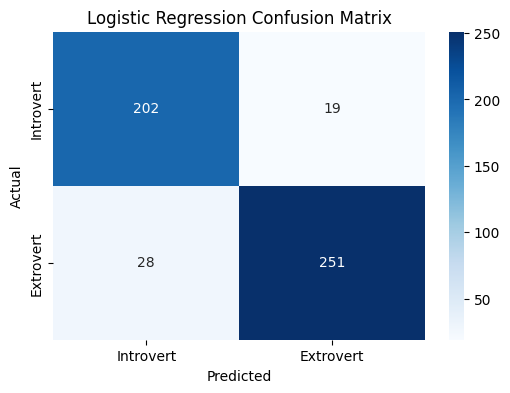

In [ ]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_y_pred = lr_model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"\nAccuracy of the Logistic Regression model: {lr_accuracy:.2f}")

#Print Classification Report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred, target_names=['Introvert', 'Extrovert']))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Introvert', 'Extrovert'], yticklabels=['Introvert', 'Extrovert'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## Random Forest


Accuracy of the Random Forest model: 0.89

Random Forest Classification Report:
              precision    recall  f1-score   support

   Introvert       0.87      0.88      0.87       221
   Extrovert       0.90      0.89      0.90       279

    accuracy                           0.89       500
   macro avg       0.88      0.89      0.88       500
weighted avg       0.89      0.89      0.89       500



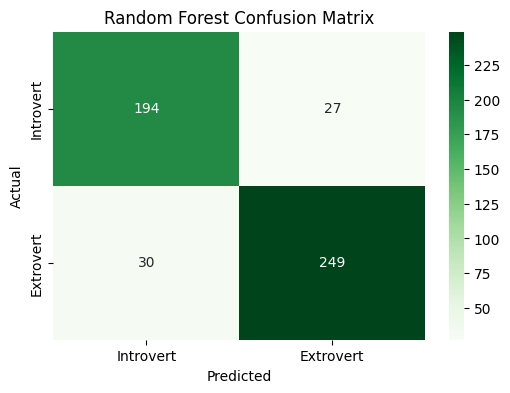

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"\nAccuracy of the Random Forest model: {rf_accuracy:.2f}")

#Print Classification Report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred, target_names=['Introvert', 'Extrovert']))

# Plot Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Introvert', 'Extrovert'], yticklabels=['Introvert', 'Extrovert'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

## SVM


Accuracy of the SVM model: 0.91

SVM Classification Report:
              precision    recall  f1-score   support

   Introvert       0.88      0.92      0.90       221
   Extrovert       0.93      0.90      0.92       279

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



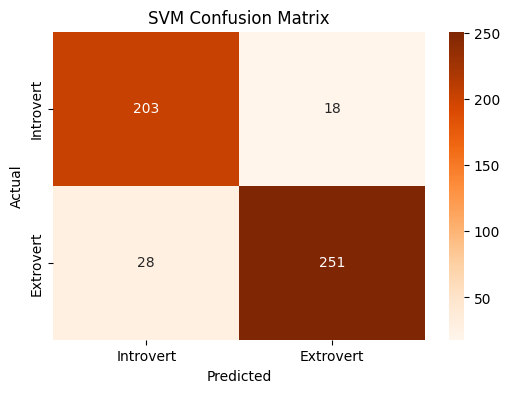

In [ ]:
# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

#Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"\nAccuracy of the SVM model: {svm_accuracy:.2f}")

#Print Classification Report
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_y_pred, target_names=['Introvert', 'Extrovert']))

#Plot Confusion Matrix
cm_svm = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Introvert', 'Extrovert'], yticklabels=['Introvert', 'Extrovert'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Model Validating
In this context, Model Validation ensures that the model accurately predicts introversion or extroversion based on behavioral features like time spent alone and friend circle size, social event attendance, stage fear and more. It verifies that the model cators to future individuals, and not only restricted to the training data.

##Logistic Regression

Test Set Metrics (Before CV):
Accuracy: 0.91
Precision: 0.93
Recall: 0.90
F1: 0.91

Cross Validation Results for Logistic Regression:
Accuracy: 0.92
Precision: 0.94
Recall: 0.93
F1: 0.93


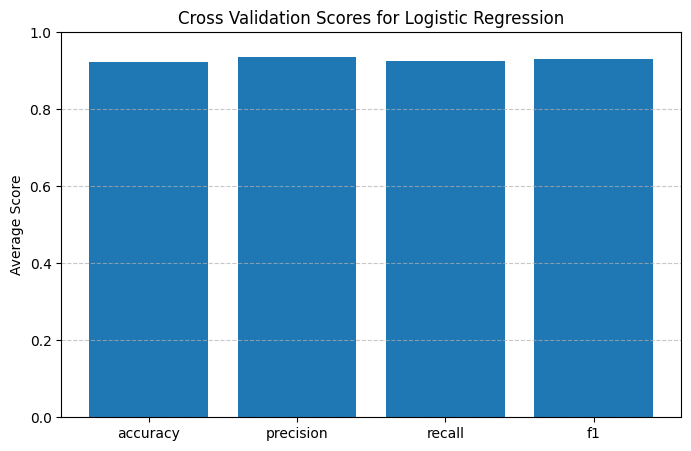

In [ ]:
# Model Validation for Logistic Regression.
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


#Step 1: Define the metrics.
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

#Step 2: Perform Cross-Validation.
cv_results = cross_validate(LogisticRegression(random_state=42, max_iter = 1000), X, y, cv=5, scoring=scoring_metrics)

#Step 3: Calculate the average for each metric.
avg_scores = {metric: cv_results[f'test_{metric}'].mean() for metric in scoring_metrics}

#Step 4: Scores before Cross Validation.
test_metrics = {
    'accuracy': accuracy_score(y_test, lr_y_pred),
    'precision': precision_score(y_test, lr_y_pred),
    'recall': recall_score(y_test, lr_y_pred),
    'f1': f1_score(y_test, lr_y_pred)
}

print("Test Set Metrics (Before CV):")
for metric, value in test_metrics.items():
    print(f"{metric.capitalize()}: {value:.2f}")

#Step 5: Print the average scores.
print("\nCross Validation Results for Logistic Regression:")
for metric, score in avg_scores.items():
    print(f"{metric.capitalize()}: {score:.2f}")


#Step 6: Visualization.
plt.figure(figsize= (8,5))
plt.bar(avg_scores.keys(), avg_scores.values())
plt.ylim(0,1)
plt.ylabel('Average Score')
plt.title('Cross Validation Scores for Logistic Regression')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

logistic_scores = avg_scores

##Random Forest

Metrics Score before CV:
Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1: 0.90

Cross Validation Results for Random Forest:
Accuracy: 0.90
Precision: 0.91
Recall: 0.91
F1: 0.91


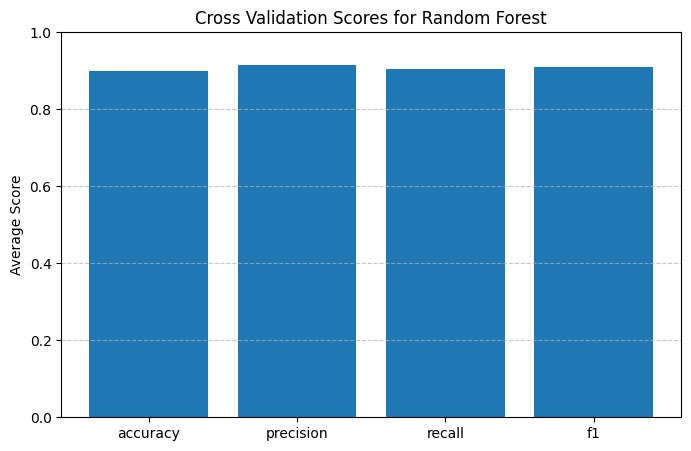

In [ ]:
#Model Validation for Random Forest.
from sklearn.model_selection import cross_validate

# Step 1: Define the metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Step 2: Perform Cross-Validation
cv_results = cross_validate(RandomForestClassifier(random_state=42), X, y, cv=5, scoring=scoring_metrics)

# Step 3: Calculate the average for each metric
avg_scores = {metric: cv_results[f'test_{metric}'].mean() for metric in scoring_metrics}

# Step 4: Scores before Cross Validation
rf_y_pred = RandomForestClassifier(random_state=42).fit(X_train, y_train).predict(X_test)
test_metrics = {
    'accuracy': accuracy_score(y_test, rf_y_pred),
    'precision': precision_score(y_test, rf_y_pred),
    'recall': recall_score(y_test, rf_y_pred),
    'f1': f1_score(y_test, rf_y_pred)
}

print("Metrics Score before CV:")
for metric, value in test_metrics.items():
    print(f"{metric.capitalize()}: {value:.2f}")

# Step 5: Print the average scores
print("\nCross Validation Results for Random Forest:")
for metric, score in avg_scores.items():
    print(f"{metric.capitalize()}: {score:.2f}")

# Step 6: Visualization
plt.figure(figsize=(8, 5))
plt.bar(avg_scores.keys(), avg_scores.values())
plt.ylim(0, 1)
plt.ylabel('Average Score')
plt.title('Cross Validation Scores for Random Forest')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

rf_scores = avg_scores

## SVM


Metrics Score before CV:
Accuracy: 0.91
Precision: 0.93
Recall: 0.90
F1: 0.92

Cross Validation Results for SVM:
Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1: 0.93


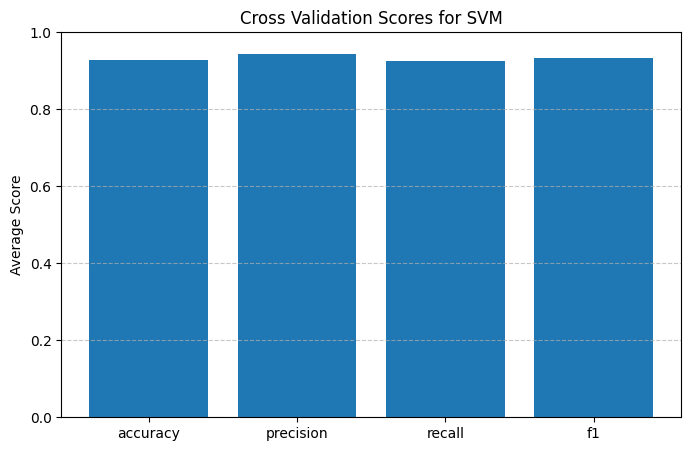

In [ ]:
# Model Validation for SVM
from sklearn.model_selection import cross_validate

# Step 1: Define the metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Step 2: Perform Cross-Validation
cv_results = cross_validate(SVC(random_state=42), X, y, cv=5, scoring=scoring_metrics)

# Step 3: Calculate the average for each metric
avg_scores = {metric: cv_results[f'test_{metric}'].mean() for metric in scoring_metrics}

# Step 4: Scores before Cross Validation
svm_y_pred = SVC(random_state=42).fit(X_train, y_train).predict(X_test)
test_metrics = {
    'accuracy': accuracy_score(y_test, svm_y_pred),
    'precision': precision_score(y_test, svm_y_pred),
    'recall': recall_score(y_test, svm_y_pred),
    'f1': f1_score(y_test, svm_y_pred)
}

print("Metrics Score before CV:")
for metric, value in test_metrics.items():
    print(f"{metric.capitalize()}: {value:.2f}")

# Step 5: Print the average scores
print("\nCross Validation Results for SVM:")
for metric, score in avg_scores.items():
    print(f"{metric.capitalize()}: {score:.2f}")

# Step 6: Visualization
plt.figure(figsize=(8, 5))
plt.bar(avg_scores.keys(), avg_scores.values())
plt.ylim(0, 1)
plt.ylabel('Average Score')
plt.title('Cross Validation Scores for SVM')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

svm_scores = avg_scores

## Best Model (Overall Model Performance)

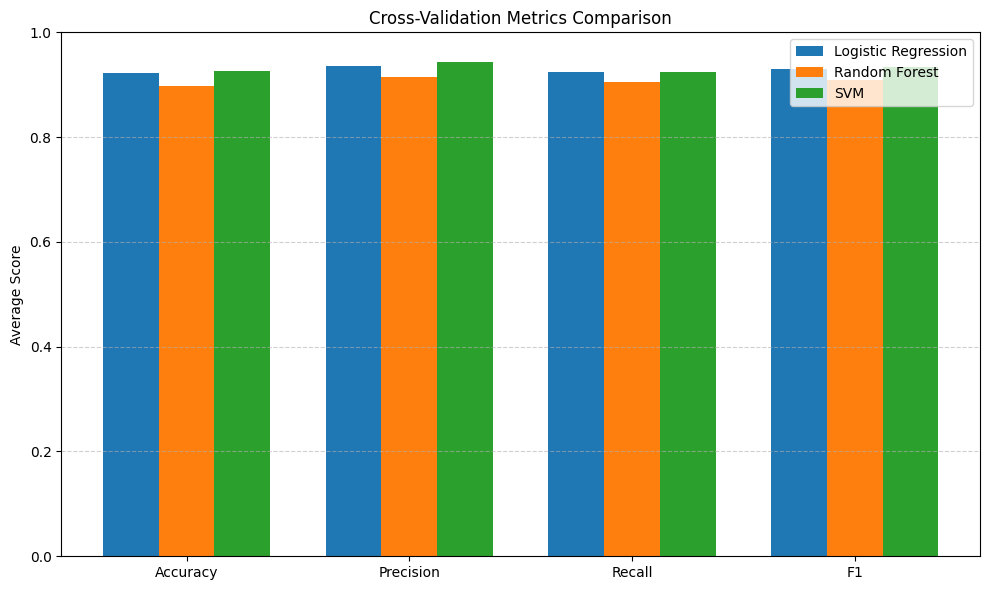

In [ ]:
#Step 1: Group scores for each model.
model_scores = {
    'Logistic Regression': logistic_scores,
    'Random Forest': rf_scores,
    'SVM': svm_scores
}

# Step 2: Summarised visual of performance metrics for each model.
metrics = ['accuracy', 'precision', 'recall', 'f1']
x = np.arange(len(metrics))
width = 0.25
plt.figure(figsize=(10, 6))

for i, (model, scores) in enumerate(model_scores.items()):
    plt.bar(x + i * width, [scores[m] for m in metrics], width=width, label=model)
plt.xticks(x + width, [m.capitalize() for m in metrics])
plt.ylim(0, 1)
plt.ylabel('Average Score')
plt.title('Cross-Validation Metrics Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()